# ECSE415 - Intro to Computer Vision
## Assignment 1 - Image Filtering
### Alexander Harris - 260688155

# Filtering - Denoising

In [1]:
import cv2
import matplotlib.pyplot as plt
import math
from skimage import measure as skimg

# Import noisy image
noisy_img = cv2.imread('data/gaussian_noise_peppers.png')

In [2]:
# 7x7 Gaussian filter with variance of 2
denoised_gaussian_img = cv2.GaussianBlur(noisy_img, (7,7), math.sqrt(2))

# 7x7 Box filter with original image depth
denoised_box_img = cv2.boxFilter(noisy_img, -1, (7,7))

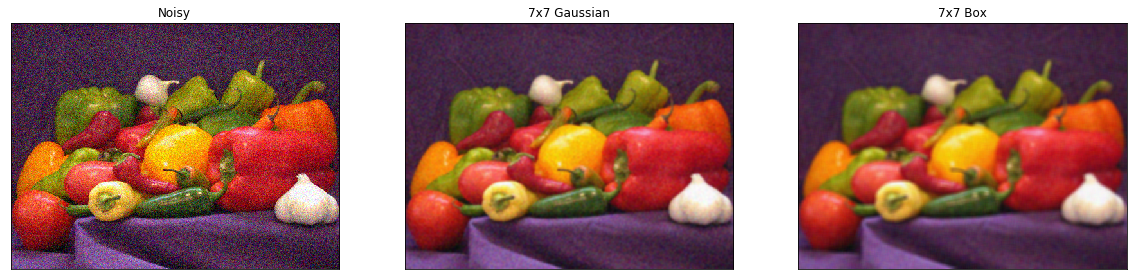

In [3]:
# Display images
plt.figure(figsize=(20, 20))
plt.subplot(131), plt.imshow(cv2.cvtColor(noisy_img, cv2.COLOR_BGR2RGB))
plt.title('Noisy'), plt.xticks([]), plt.yticks([])
plt.subplot(132), plt.imshow(cv2.cvtColor(denoised_gaussian_img, cv2.COLOR_BGR2RGB))
plt.title('7x7 Gaussian'), plt.xticks([]), plt.yticks([])
plt.subplot(133), plt.imshow(cv2.cvtColor(denoised_box_img, cv2.COLOR_BGR2RGB))
plt.title('7x7 Box'), plt.xticks([]), plt.yticks([])
plt.show()

### Comparing PSNR for Gaussian and box filters:

In [4]:
# Import clean image
clean_img = cv2.imread('data/peppers.png')

In [5]:
# Compare PSNR using clean image as baseline
psnr_gaussian = skimg.compare_psnr(clean_img, denoised_gaussian_img)
psnr_box = skimg.compare_psnr(clean_img, denoised_box_img)
print('Gaussian PSNR: %f' % psnr_gaussian)
print('Box PSNR: %f' % psnr_box)

Gaussian PSNR: 29.879273
Box PSNR: 28.278396


Here we can see that the image with the Gaussian filter has a higher PSNR of ~29.88 and is therefore a superior result when compared to the resulting image from the box filter. We can confirm this through observation as the Gaussian-filtered image appears clearer than the box-filtered one.

In [6]:
# Import salt and pepper noise image
salt_pepper_img = cv2.imread('data/saltandpepper_noise_peppers.png')

In [7]:
# 7x7 Gaussian filter with variance of 2
gaussian_salt_img = cv2.GaussianBlur(salt_pepper_img, (7,7), math.sqrt(2))

# 7x7 Median filter
median_salt_img = cv2.medianBlur(salt_pepper_img, 7)

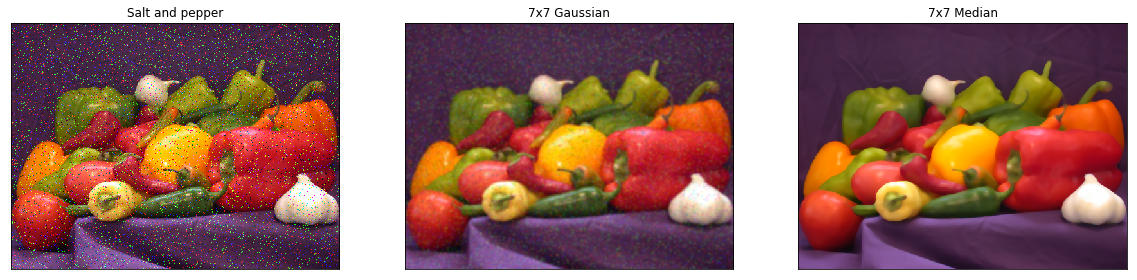

In [8]:
# Display images
plt.figure(figsize=(20, 20))
plt.subplot(131), plt.imshow(cv2.cvtColor(salt_pepper_img, cv2.COLOR_BGR2RGB))
plt.title('Salt and pepper'), plt.xticks([]), plt.yticks([])
plt.subplot(132), plt.imshow(cv2.cvtColor(gaussian_salt_img, cv2.COLOR_BGR2RGB))
plt.title('7x7 Gaussian'), plt.xticks([]), plt.yticks([])
plt.subplot(133), plt.imshow(cv2.cvtColor(median_salt_img, cv2.COLOR_BGR2RGB))
plt.title('7x7 Median'), plt.xticks([]), plt.yticks([])
plt.show()

### Comparing PSNR for Gaussian and median filters:

In [9]:
# Compare PSNR using clean image as baseline
psnr_gaussian_salt = skimg.compare_psnr(clean_img, gaussian_salt_img)
psnr_median_salt = skimg.compare_psnr(clean_img, median_salt_img)
print('Gaussian PSNR: %f' % psnr_gaussian_salt)
print('Median PSNR: %f' % psnr_median_salt)

Gaussian PSNR: 28.167165
Median PSNR: 31.871010


Here we can see that the image with the median filter has a higher PSNR of ~31.87 and is therefore a superior result when compared to the resulting image from the Gaussian filter. We can confirm this through observation as the median-filtered images appears less "noisy" than the Gaussian-filtered one.